In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=15,6

In [7]:
df = pd.read_csv('AirPassengers.csv')
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
# 2️⃣ Set 'Month' as the DataFrame index
df.set_index('Month', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [79]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


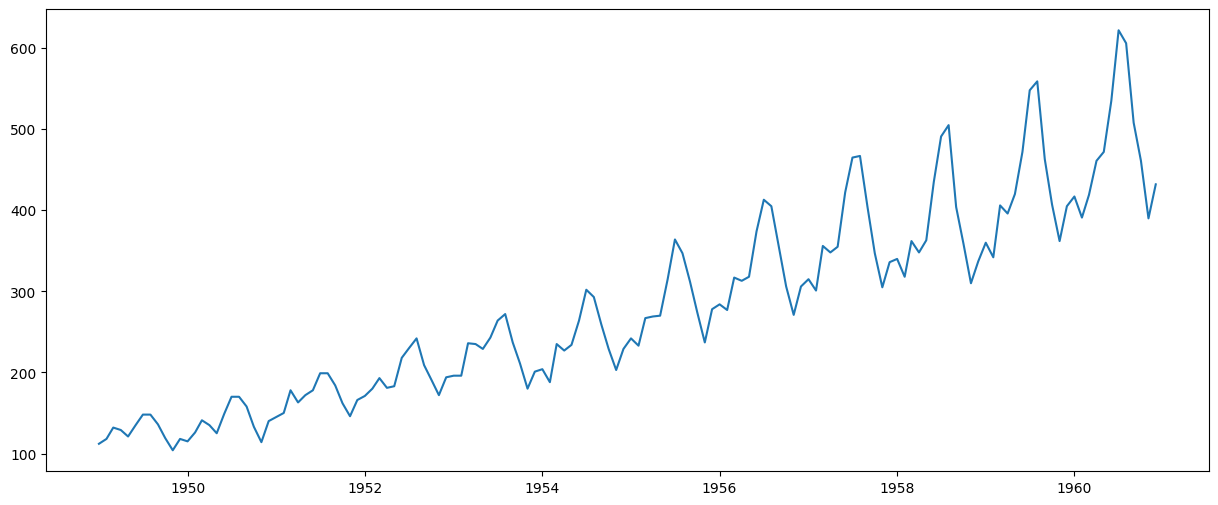

In [13]:
plt.plot(df['#Passengers'])
plt.show()

#### Deduced from Graph
- Increasing Trend
- Increasing Seasonality
- Therefore multiplicative decomposition

In [14]:
# Convert to timeseries

ts = df['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [15]:
# Checking indexing of data

ts['1949-01-01']

np.int64(112)

In [16]:
# Import datetime library and use 'datetime function

from datetime import datetime
ts[datetime(1949,1,1)]

np.int64(112)

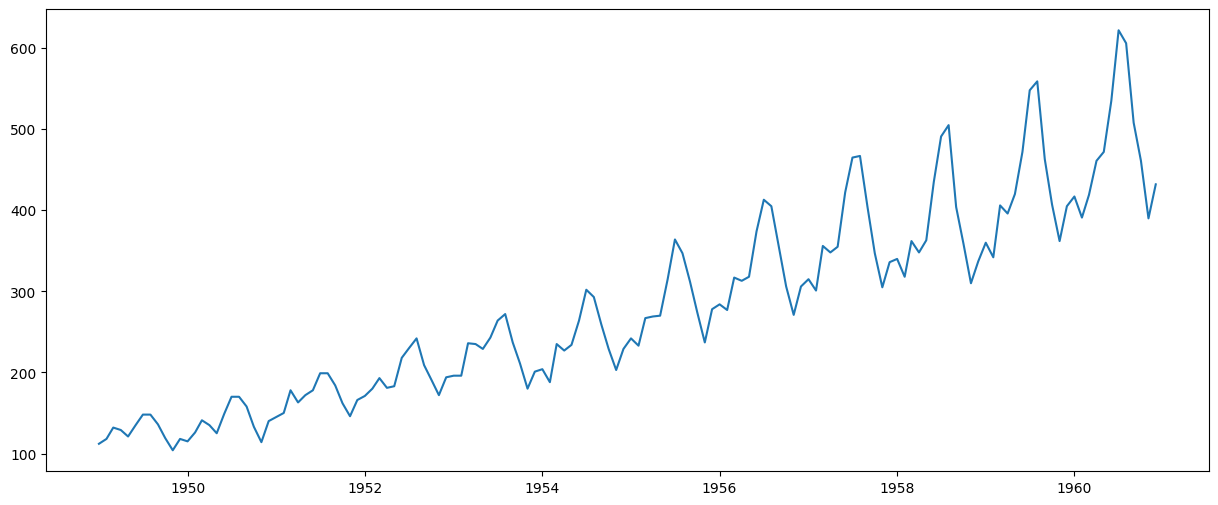

In [17]:
# Check Stationarity
plt.plot(ts)

##### Architecture of TSDA
- TS data
- Manual Visual Interpretation (Seasonality,Trend)
- Stationarity Test (ADF Test)
- if (Stationary) - Do Forecasting
- if (!Stationary) -Transformations (Diff, Log Transf , Double Log Trans)
- After each transformation again do stationarity test
- After Forecast 
- Inverse Transformation

##### Stationarity Test

In [18]:
# STATIONARITY TEST
# H0: TS is non-Stationary
# H1: TS is stationary

import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determining rolling statistics
    #rolmean = pd.rolling_mean(timeseries,window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    # taking moving avg of 12 data points since year consists of 12 months
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(rolmean, color='red',label ='Rolling Mean')
    std = plt.plot(rolstd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test")
    dftest= adfuller(timeseries,autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


In [19]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

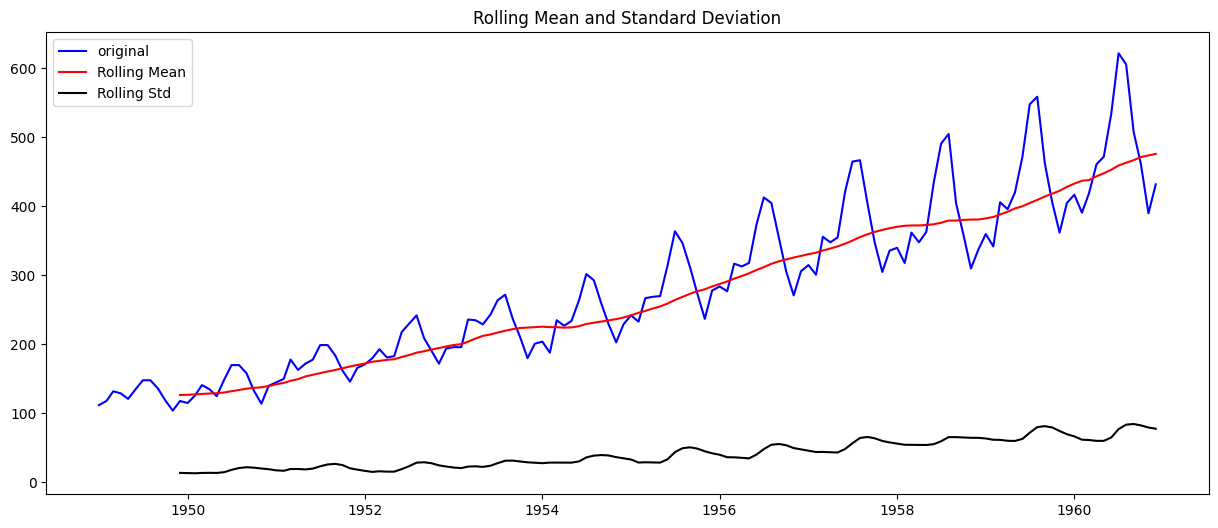

Results of Dickey Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
test_stationarity(ts)

##### Making Ts Stationary
- Log Transformation - np.log(x) -> np.exp(logged_x_Data)
- Differencing
- Double Log - np.log(logged_x_Data) -> np.e(double_log_x_Data)
- Double Differencing
- Log + Differencing 
- After forecasting is done, always use inverse transformation.

In [21]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [22]:
# Log Transformation
ts_log = np.log(ts)


In [23]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

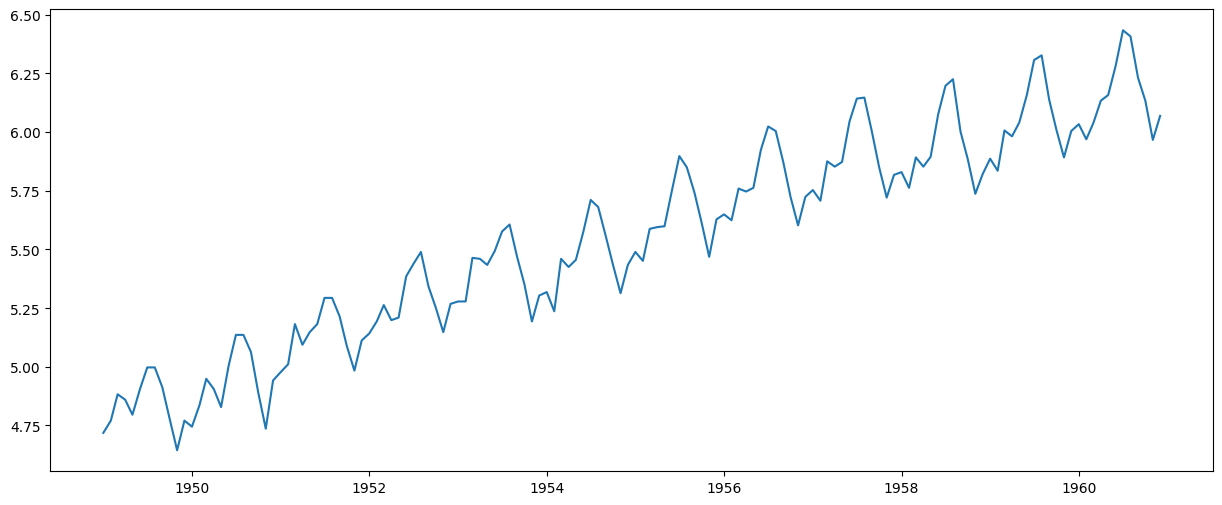

In [24]:
plt.plot(ts_log)

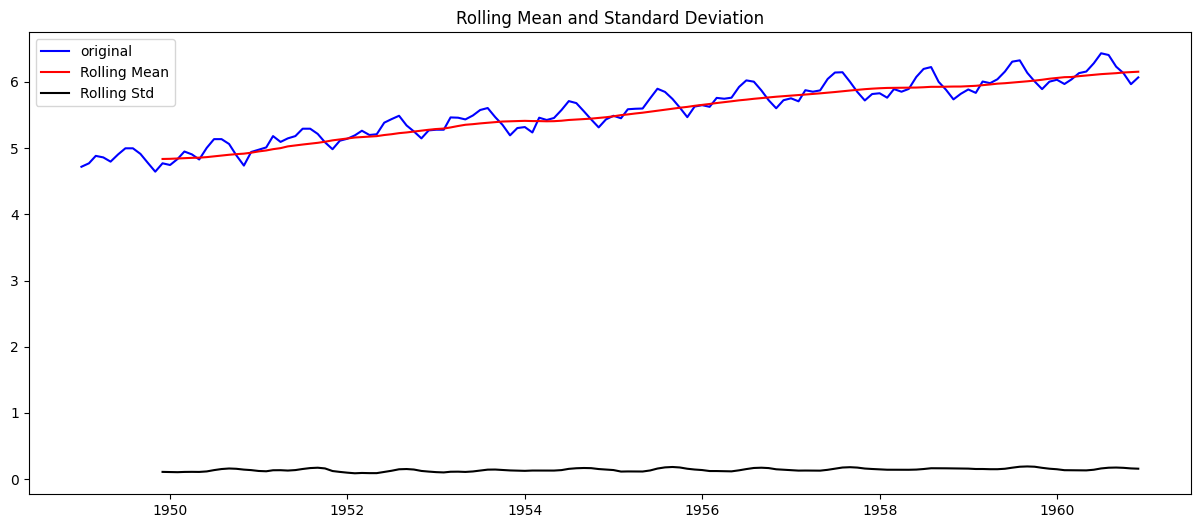

Results of Dickey Fuller Test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
# Check Stationarity

test_stationarity(ts_log)

In [26]:
# Double Log

ts_doublelog = np.log(ts_log)


In [27]:
ts_doublelog

Month
1949-01-01    1.551491
1949-02-01    1.562490
1949-03-01    1.585719
1949-04-01    1.581000
1949-05-01    1.567739
                ...   
1960-08-01    1.857372
1960-09-01    1.829454
1960-10-01    1.813749
1960-11-01    1.786101
1960-12-01    1.803099
Name: #Passengers, Length: 144, dtype: float64

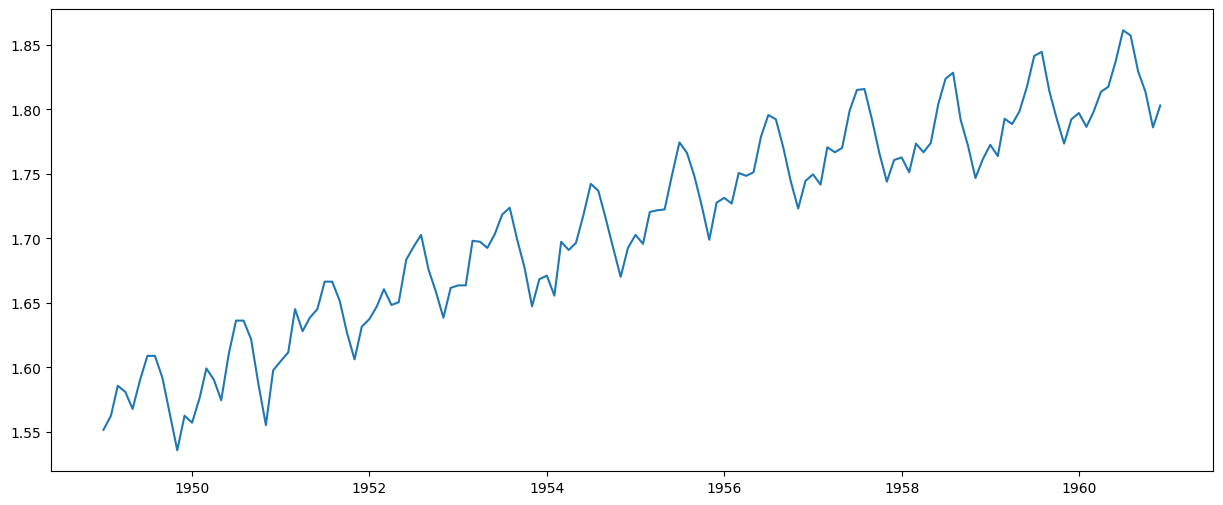

In [28]:
plt.plot(ts_doublelog)

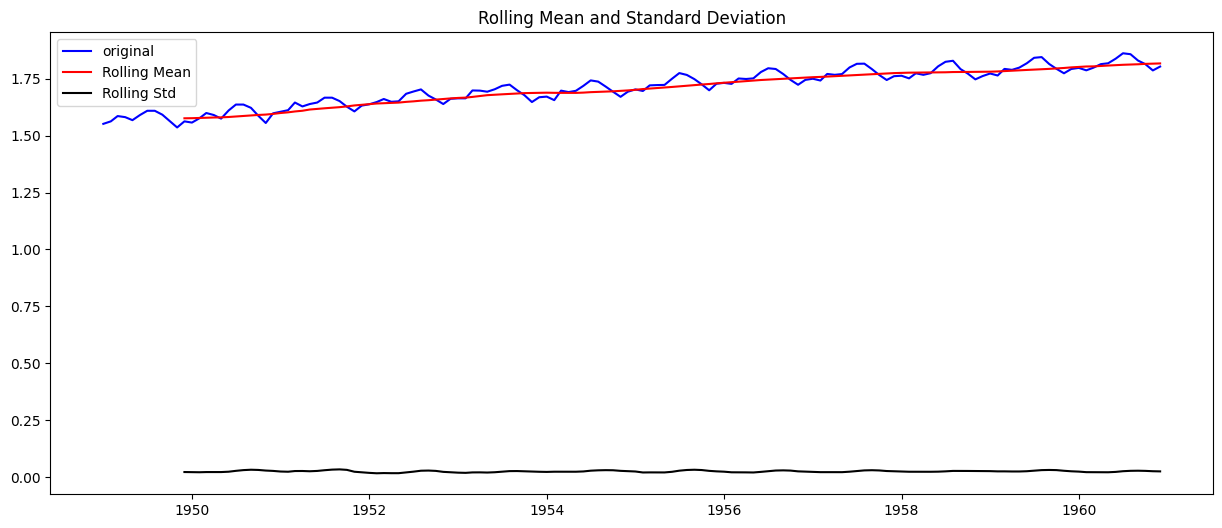

Results of Dickey Fuller Test
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
test_stationarity(ts_doublelog)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

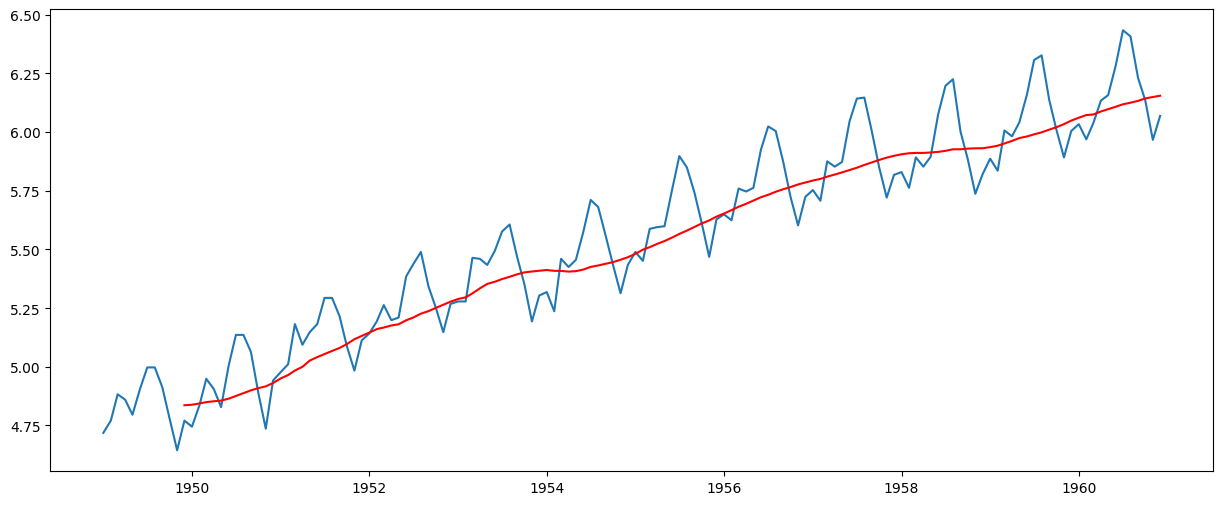

In [30]:
# Smoothing
# Log- MA - Differencing

moving_Avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_Avg,color='red')

ts_log_moving_Avg_Diff = ts_log - moving_Avg
ts_log_moving_Avg_Diff.head(5)

ts_log_moving_Avg_Diff.dropna(inplace = True)
ts_log_moving_Avg_Diff.head(5)

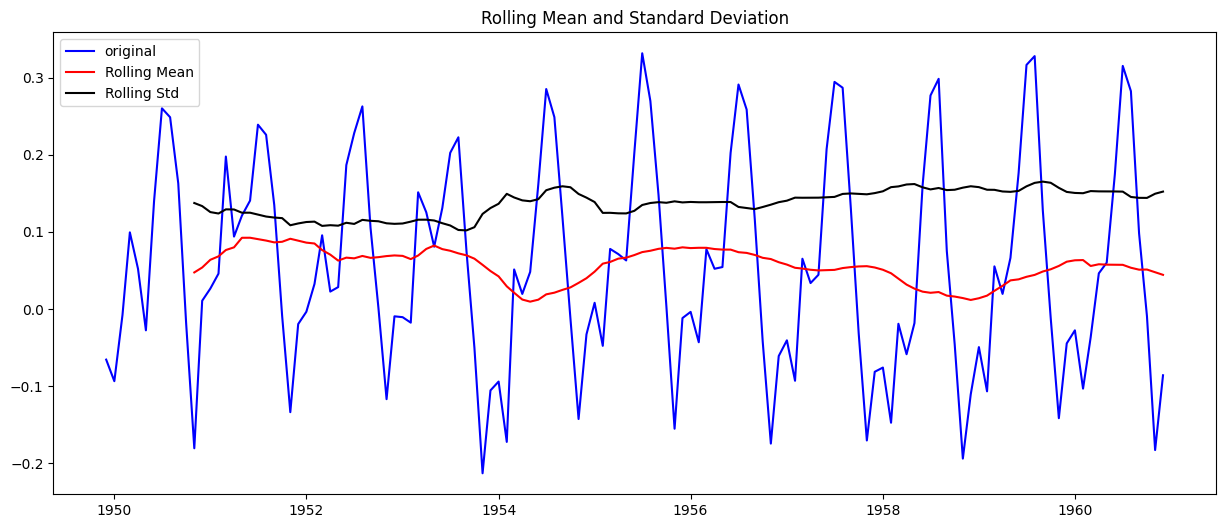

Results of Dickey Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationarity(ts_log_moving_Avg_Diff)

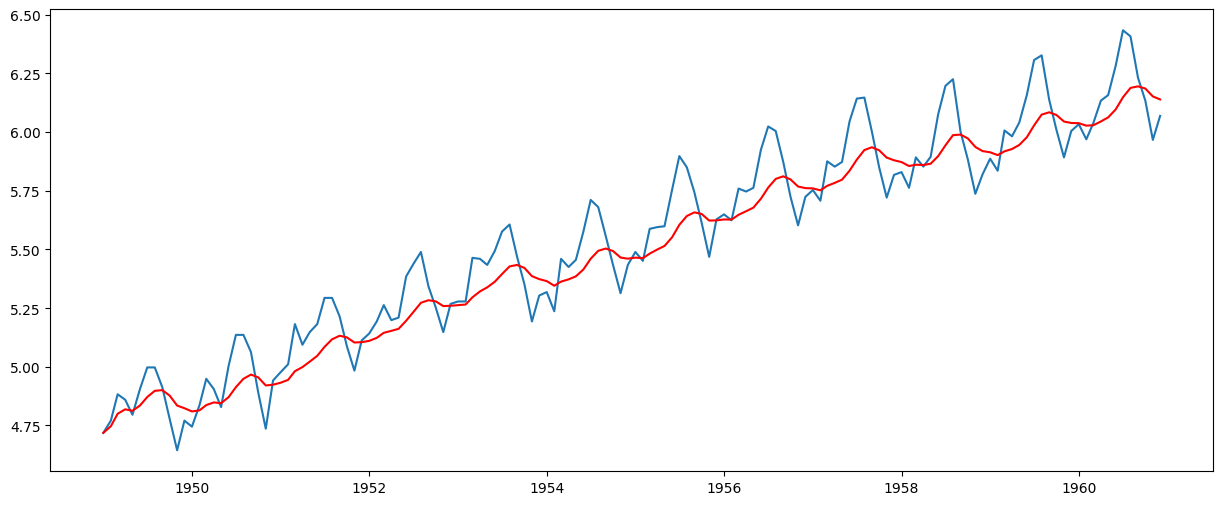

In [32]:
# Exponential Weighted Avg

expweighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

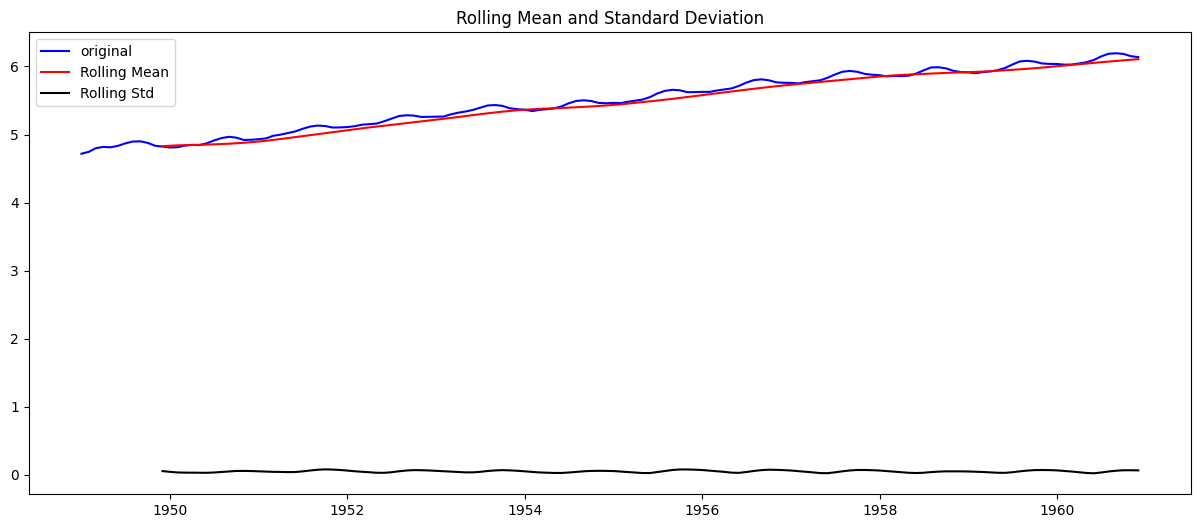

Results of Dickey Fuller Test
Test Statistic                  -2.477357
p-value                          0.121081
#Lags Used                      14.000000
Number of observations used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [33]:
test_stationarity(expweighted_avg)

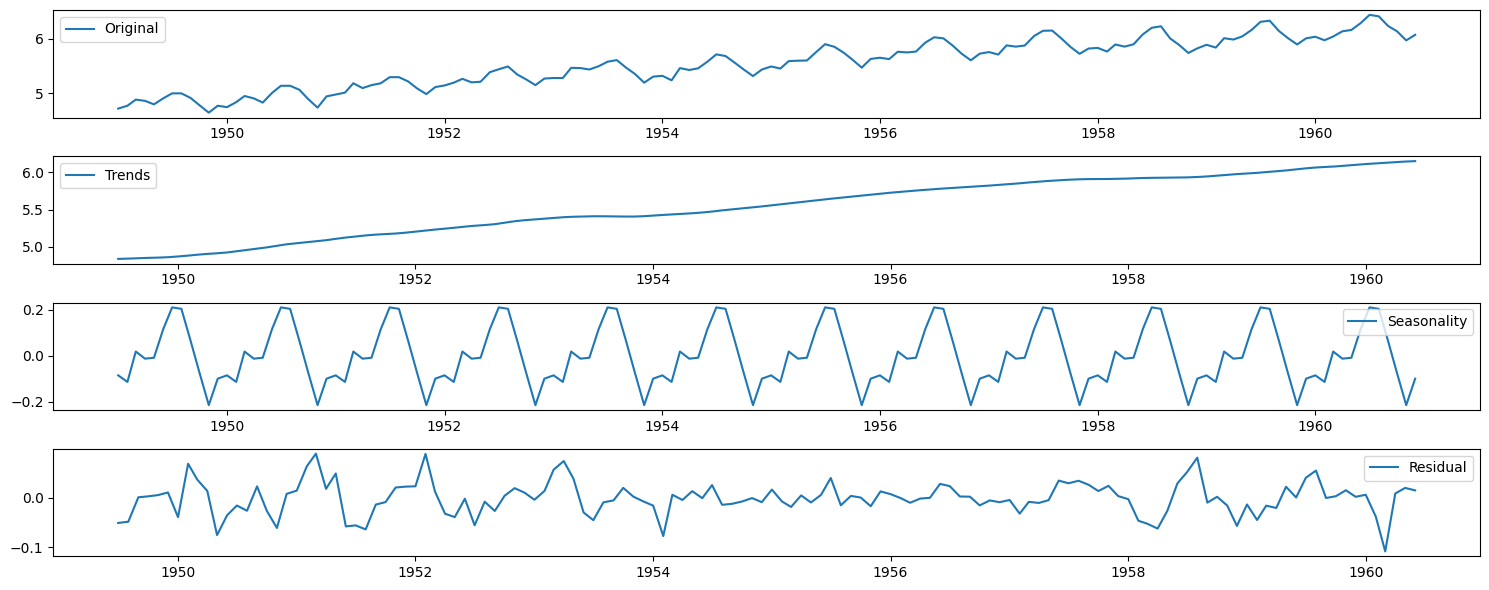

In [34]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trends')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()


# remove trend , seasonality etc from ts = residual
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)




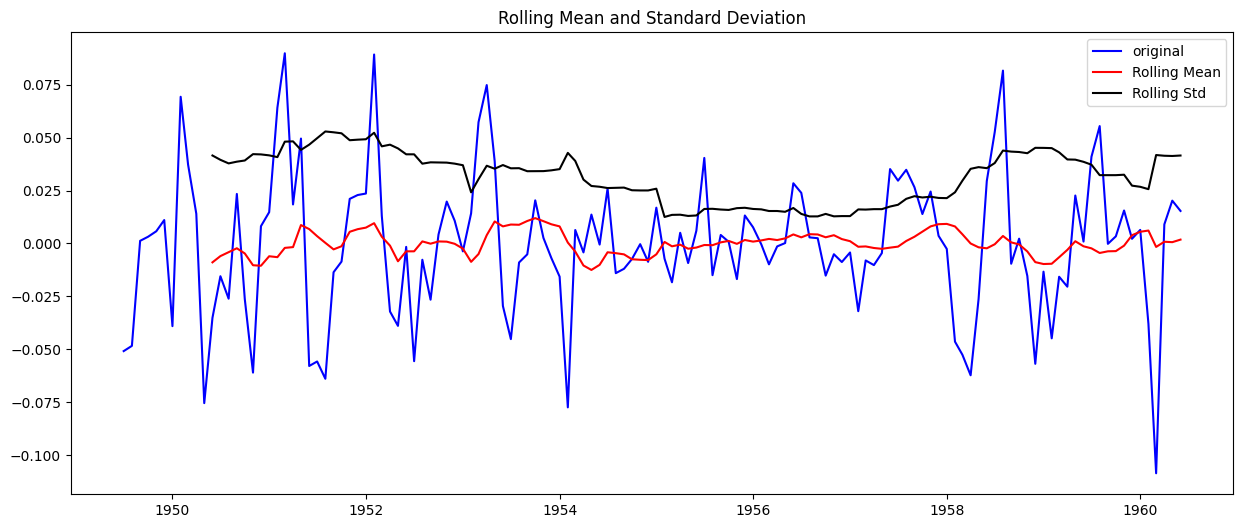

Results of Dickey Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [35]:
test_stationarity(ts_log_decompose)

p-value - 0.000002 something

#### ACF & PACF Plots to get optimum p and q values

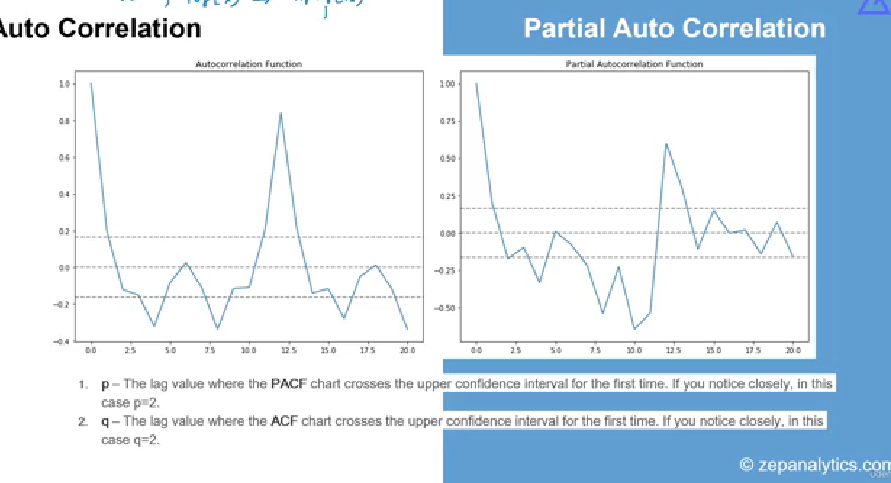

In [44]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

#### Find Optimum p and q values using Grid Search

In [45]:
# Define the train-test split ratio
train_size = int(len(ts_log) * 0.8)  # 80% for training, 20% for testing

# Split the data
train, test = ts_log[0:train_size], ts_log[train_size:]

print(f"Training size: {len(train)}")
print(f"Testing size: {len(test)}")

Training size: 115
Testing size: 29


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define ranges for p, q and d
p_values = [1,2]
d_values =[0,1]
q_values =[1,2]

best_rmse, best_p,best_d,best_q = np.inf, None, None , None

history = [x for x in train] # Training data


# make predictions
predictions = list()

# Perform Grid Search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order =(p,d,q)
            try:
                for t in range(len(test)):
                    # Fit the model
                    model = ARIMA(history, order=order)
                    model_fit = model.fit()
                    yhat = model_fit.forecast()[0]
                    predictions.append(yhat)
                    history.append(test[t])

                # Calculate rmse
                rmse =np.sqrt (mean_squared_error(test,predictions))

                # Update best rmse and parameter values
                if rmse < best_rmse:
                    best_rmse, best_p,best_d,best_q= rmse, p, d, q
            
            except:
                continue

print(f"Best RMSE: {best_rmse}")
print(f"Best p: {best_p}")
print(f"Best d: {best_d}")
print(f"Best q: {best_q}")



C:\Users\HP\AppData\Local\Temp\ipykernel_8832\1978516361.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])
C:\Users\HP\AppData\Local\Temp\ipykernel_8832\1978516361.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])
c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\statsmodels\base\model.py:607: C

Best RMSE: 0.11066955876596284
Best p: 1
Best d: 0
Best q: 1


In [47]:
# In Production, check with a larger combination pool
# optimum p, d, q values : 1,0, 1

In [65]:
train

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1958-03-01    5.891644
1958-04-01    5.852202
1958-05-01    5.894403
1958-06-01    6.075346
1958-07-01    6.196444
Name: #Passengers, Length: 115, dtype: float64

##### Model Building

In [ ]:
# Replace with your optimal values
best_order = (best_p, best_d, best_q)

history =  [x for x in train]
predictions = list()

for t in range(len(test)):
    try:
        model = ARIMA(history, order =(1,0,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat= output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs) # Step Forecasting
    except (ValueError):
        pass
    print(t, output)
    print('predicted=%f,expected=%f' %(yhat,obs))

error = mean_squared_error(test,predictions)
rmse = mean_squared_error(test,predictions)**0.5
print('Test MSE: %.3f' % rmse)



C:\Users\HP\AppData\Local\Temp\ipykernel_8832\649768308.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted=6.194100,expected=6.224558
predicted=6.203291,expected=6.001415
predicted=5.913128,expected=5.883322
predicted=5.850263,expected=5.736572
predicted=5.682532,expected=5.820083
predicted=5.837931,expected=5.886104
predicted=5.876555,expected=5.834811
predicted=5.800799,expected=6.006353
predicted=6.038286,expected=5.981414
predicted=5.941472,expected=6.040255
predicted=6.039923,expected=6.156979
predicted=6.160707,expected=6.306275
predicted=6.317425,expected=6.326149
predicted=6.300433,expected=6.137727
predicted=6.064993,expected=6.008813
predicted=5.968770,expected=5.891644
predicted=5.848227,expected=6.003887
predicted=6.024984,expected=6.033086
predicted=6.011734,expected=5.968708
predicted=5.934627,expected=6.037871
predicted=6.044128,expected=6.133398
predicted=6.134100,expected=6.156979
predicted=6.138497,expected=6.282267
predicted=6.297221,expected=6.432940
predicted=6.445574,expected=6.406880
predicted=6.368446,expected=6.230481
predicted=6.162510,expected=6.133398
p

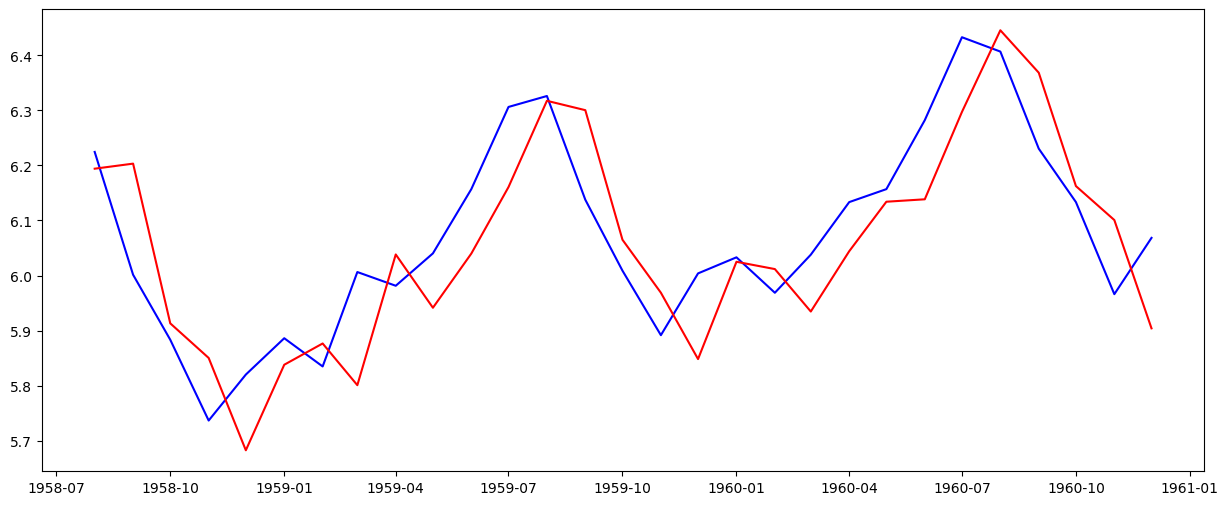

In [70]:
pred_series = pd.Series(predictions, index=test.index)
plt.plot(test,color='blue',label='test')
plt.plot(pred_series,color='red',label='pred')
plt.show()

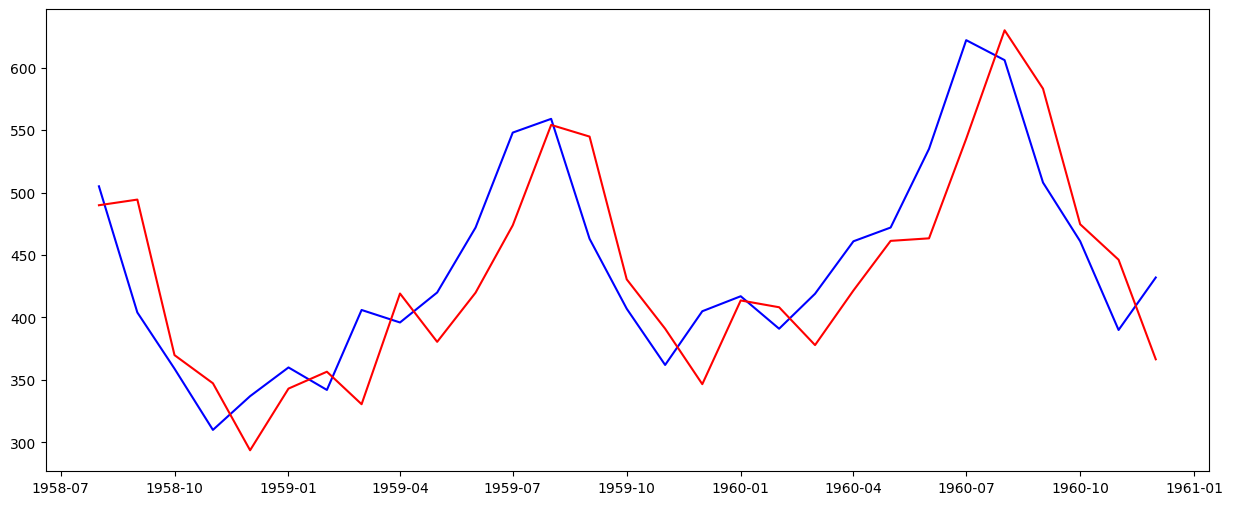

In [71]:
pred_inverse_transformed= pd.Series(np.exp(predictions),index= test.index)
test_inverse_transformed = np.exp(test)
plt.plot(test_inverse_transformed,color='blue',label='test')
plt.plot(pred_inverse_transformed,color='red',label='pred')
plt.show()

In [76]:
# Out of sample forecast

forecast = model_fit.forecast(steps=1)
# forecast of 1 year

In [78]:
np.exp(forecast)

array([366.52455263])